In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import Image

In [2]:
import tensorflow as tf

In [3]:
print tf.__version__

1.0.1


In [4]:
from nets import nets_factory

In [5]:
from preprocessing import preprocessing_factory

In [6]:
import reader

In [7]:
import model

In [8]:
import time
import os

In [9]:
tf.logging.set_verbosity(tf.logging.INFO)

In [10]:
%ls 'trained_models'

cubist.ckpt-done           feathers.ckpt-done  scream.ckpt-done  wave.ckpt-done
denoised_starry.ckpt-done  mosaic.ckpt-done    udnie.ckpt-done


In [11]:
image_file = "img/test.jpg"
image_size = 256
loss_model = 'vgg_16'
model_file = "trained_models/denoised_starry.ckpt-done"

In [12]:
height = 0
width = 0

In [13]:
with open(image_file, 'rb') as img:
    with tf.Session().as_default() as sess:
        if image_file.lower().endswith('png'):
            image = sess.run(tf.image.decode_png(img.read()))
        else:
            image = sess.run(tf.image.decode_jpeg(img.read()))
        height = image.shape[0]
        width = image.shape[1]        
tf.logging.info('Image size: %dx%d' % (width, height))

INFO:tensorflow:Image size: 712x474


In [14]:
image_preprocessing_fn, _ = preprocessing_factory.get_preprocessing(loss_model,is_training=False)

In [15]:
image = reader.get_image(image_file, height, width, image_preprocessing_fn)

In [16]:
image = tf.expand_dims(image, 0)

In [17]:
generated = model.net(image, training=False)

In [18]:
generated = tf.squeeze(generated, [0])

In [19]:
saver = tf.train.Saver(tf.global_variables(), write_version=tf.train.SaverDef.V1)

In [20]:
sess.run([tf.global_variables_initializer(), tf.local_variables_initializer()])

[None, None]

In [21]:
model_file = os.path.abspath(model_file)

In [22]:
saver.restore(sess, model_file)

In [23]:
start_time = time.time()

In [24]:
generated = sess.run(generated)

In [25]:
generated = tf.cast(generated, tf.uint8)

In [26]:
end_time = time.time()

In [27]:
tf.logging.info('Elapsed time: %fs' % (end_time - start_time))

INFO:tensorflow:Elapsed time: 0.957576s


In [28]:
generated_file = 'generated/res.jpg'

In [29]:
if os.path.exists('generated') is False:
    os.makedirs('generated')

In [30]:
with open(generated_file, 'wb') as img:
    img.write(sess.run(tf.image.encode_jpeg(generated)))
    tf.logging.info('Done. Please check %s.' % generated_file)

INFO:tensorflow:Done. Please check generated/res.jpg.


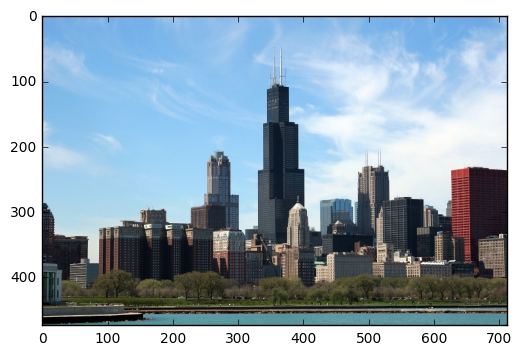

In [31]:
image_in = Image.open(image_file)
plt.imshow(image_in);

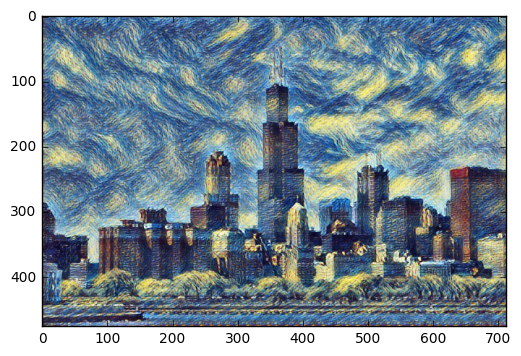

In [32]:
image_out = Image.open(generated_file)
plt.imshow(image_out)